# Data Preprocessing:

- Data Cleaning 
- EDA

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle
from statsmodels.tsa.seasonal import seasonal_decompose


### Let's check the data first

In [2]:
df = pd.read_csv("merged_data.csv")

In [3]:
df.head(10)

,Unnamed: 0,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,startTime,tripFare,paymentType,endTime
0,0,1,0,"[23.075897, 72.483299]",11.8,24.97,28,"[23.075855, 72.598551]",2023-01-01T18:53:00,124,upi,2023-01-01T19:21:00
1,1,1,1,"[23.002, 72.550009]",8.5,15.34,33,"[23.072137, 72.583952]",2023-01-01T20:39:00,91,upi,2023-01-01T21:12:00
2,2,1,2,"[22.929988, 72.578228]",13.4,27.74,29,"[23.050404, 72.578228]",2023-01-01T21:24:00,140,cash,2023-01-01T21:52:00
3,3,1,3,"[23.029391, 72.555201]",6.3,14.47,26,"[23.061703, 72.605368]",2023-01-01T21:58:00,69,cash,2023-01-01T22:23:00
4,4,1,4,"[23.067932, 72.51617]",5.7,13.42,25,"[23.103956, 72.55534]",2023-01-01T22:47:00,63,upi,2023-01-01T23:12:00
5,5,1,5,"[23.050932, 72.493464]",7.0,23.06,18,"[23.108462, 72.521314]",2023-01-02T18:17:00,76,upi,2023-01-02T18:35:00
6,6,1,6,"[22.977277, 72.530901]",7.3,19.47,22,"[23.023437, 72.581065]",2023-01-02T22:59:00,79,cash,2023-01-02T23:21:00
7,7,1,7,"[22.980471, 72.602484]",5.2,25.28,12,"[23.003947, 72.64667]",2023-01-03T19:17:00,58,upi,2023-01-03T19:29:00
8,8,1,8,"[23.050361, 72.532239]",8.9,22.33,24,"[23.106707, 72.593512]",2023-01-03T20:23:00,95,cash,2023-01-03T20:46:00
9,9,1,9,"[22.974242, 72.587366]",3.5,22.68,9,"[22.989934, 72.616895]",2023-01-03T20:45:00,41,cash,2023-01-03T20:54:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44718 entries, 0 to 44717
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     44718 non-null  int64  
 1   driverId       44718 non-null  int64  
 2   tripId         44718 non-null  int64  
 3   startLocation  44718 non-null  object 
 4   tripDistance   44718 non-null  float64
 5   tripSpeed      44718 non-null  float64
 6   tripDuration   44718 non-null  int64  
 7   endLocation    44718 non-null  object 
 8   startTime      44718 non-null  object 
 9   tripFare       44718 non-null  int64  
 10  paymentType    44718 non-null  object 
 11  endTime        44718 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 4.1+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'driverId', 'tripId', 'startLocation', 'tripDistance',
       'tripSpeed', 'tripDuration', 'endLocation', 'startTime', 'tripFare',
       'paymentType', 'endTime'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0       0
driverId         0
tripId           0
startLocation    0
tripDistance     0
tripSpeed        0
tripDuration     0
endLocation      0
startTime        0
tripFare         0
paymentType      0
endTime          0
dtype: int64

In [7]:
df.isna().sum()

Unnamed: 0       0
driverId         0
tripId           0
startLocation    0
tripDistance     0
tripSpeed        0
tripDuration     0
endLocation      0
startTime        0
tripFare         0
paymentType      0
endTime          0
dtype: int64

In [8]:
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

In [9]:
df['startTime'].loc[1]

Timestamp('2023-01-01 20:39:00')

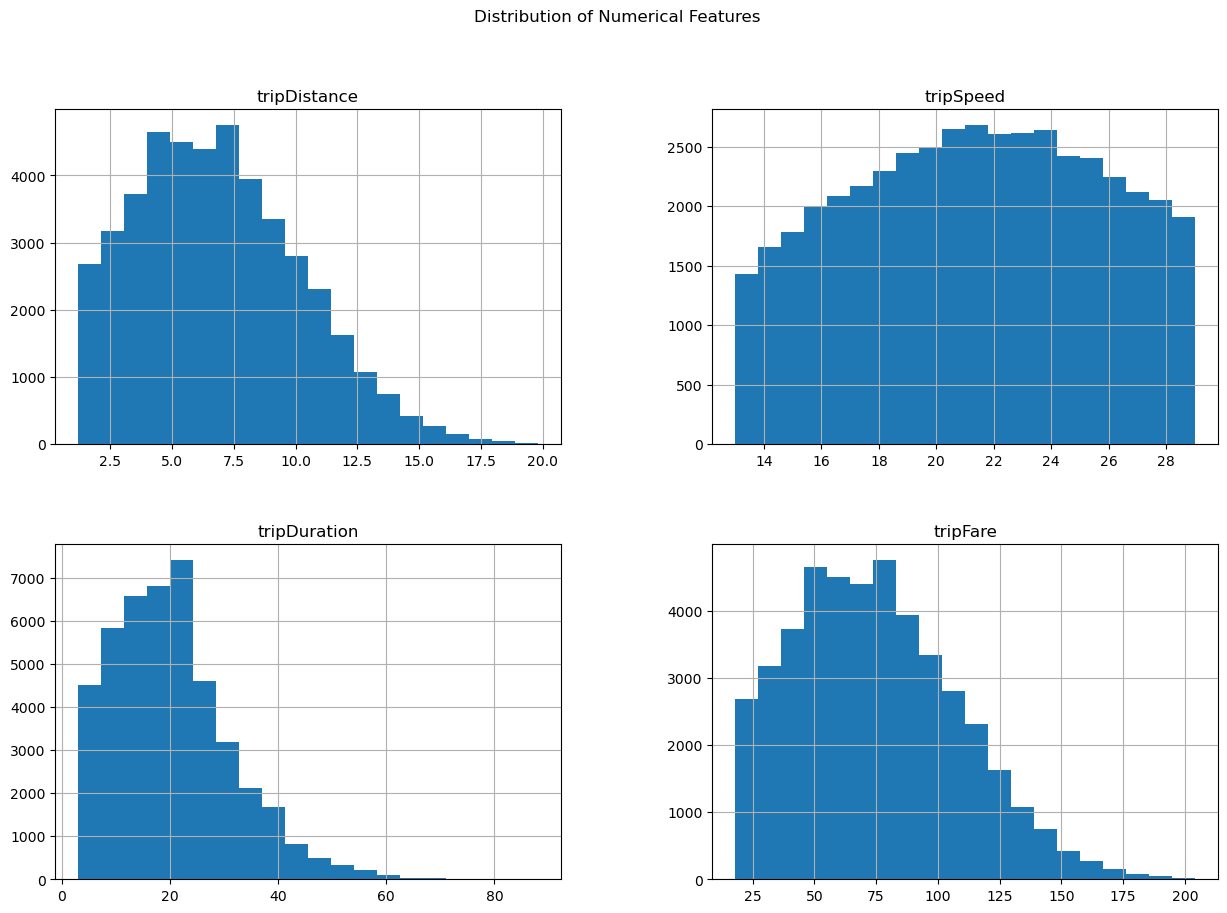

In [10]:
# Explore Data Distribution

# 'tripDistance', 'tripSpeed', 'tripDuration', 'tripFare' are key Numerical Columns
numerical_columns = ['tripDistance', 'tripSpeed', 'tripDuration', 'tripFare']

df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

### Now we know that 'demand' is our Target variable

#### Let's try and visualize relationships between numerical variables and our target variables

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


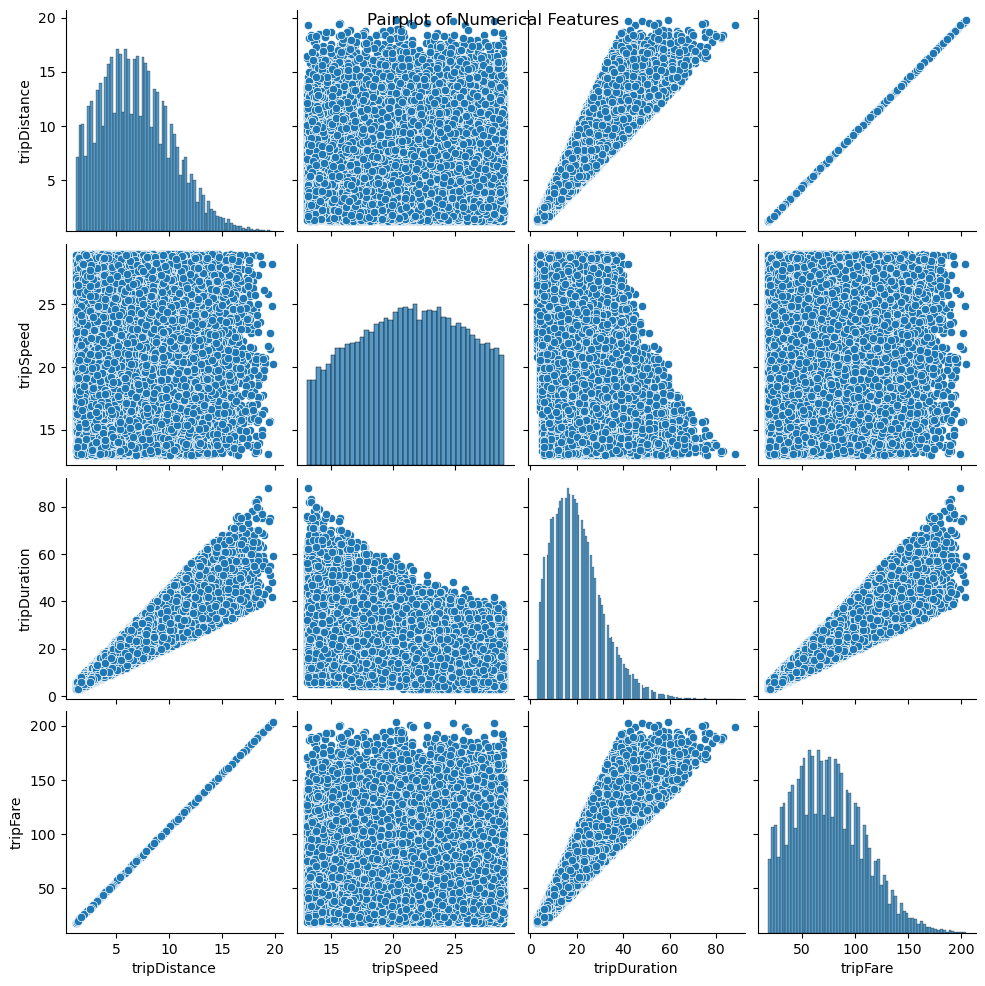

In [11]:
sns.pairplot(df[numerical_columns])  
plt.suptitle('Pairplot of Numerical Features')
plt.show()

In [12]:
df.head(10)

,Unnamed: 0,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,startTime,tripFare,paymentType,endTime
0,0,1,0,"[23.075897, 72.483299]",11.8,24.97,28,"[23.075855, 72.598551]",2023-01-01 18:53:00,124,upi,2023-01-01 19:21:00
1,1,1,1,"[23.002, 72.550009]",8.5,15.34,33,"[23.072137, 72.583952]",2023-01-01 20:39:00,91,upi,2023-01-01 21:12:00
2,2,1,2,"[22.929988, 72.578228]",13.4,27.74,29,"[23.050404, 72.578228]",2023-01-01 21:24:00,140,cash,2023-01-01 21:52:00
3,3,1,3,"[23.029391, 72.555201]",6.3,14.47,26,"[23.061703, 72.605368]",2023-01-01 21:58:00,69,cash,2023-01-01 22:23:00
4,4,1,4,"[23.067932, 72.51617]",5.7,13.42,25,"[23.103956, 72.55534]",2023-01-01 22:47:00,63,upi,2023-01-01 23:12:00
5,5,1,5,"[23.050932, 72.493464]",7.0,23.06,18,"[23.108462, 72.521314]",2023-01-02 18:17:00,76,upi,2023-01-02 18:35:00
6,6,1,6,"[22.977277, 72.530901]",7.3,19.47,22,"[23.023437, 72.581065]",2023-01-02 22:59:00,79,cash,2023-01-02 23:21:00
7,7,1,7,"[22.980471, 72.602484]",5.2,25.28,12,"[23.003947, 72.64667]",2023-01-03 19:17:00,58,upi,2023-01-03 19:29:00
8,8,1,8,"[23.050361, 72.532239]",8.9,22.33,24,"[23.106707, 72.593512]",2023-01-03 20:23:00,95,cash,2023-01-03 20:46:00
9,9,1,9,"[22.974242, 72.587366]",3.5,22.68,9,"[22.989934, 72.616895]",2023-01-03 20:45:00,41,cash,2023-01-03 20:54:00


#### Spatial Aggregation

In [13]:
import ast  # Import the ast module for literal_eval

# Convert string representations of lists to actual lists
df['startLocation'] = df['startLocation'].apply(ast.literal_eval)

# Extract latitude and longitude values and convert to numeric type
df['latitude'] = df['startLocation'].apply(lambda x: x[0]).astype(float)
df['longitude'] = df['startLocation'].apply(lambda x: x[1]).astype(float)

# Calculate bin edges based on quantiles
bin1_quantiles = df['latitude'].quantile([0, 1/3, 2/3, 1])
bin2_quantiles = df['longitude'].quantile([0, 1/3, 2/3, 1])

bin1_upper = bin1_quantiles.iloc[2]
bin2_upper = bin2_quantiles.iloc[2]



In [14]:
# Create bins for latitude and longitude based on bin edges
df['latitude_bin'] = pd.cut(df['latitude'], bins=[float('-inf'), bin1_upper, bin2_upper, float('inf')], labels=['Bin 1', 'Bin 2', 'Bin 3'])
df['longitude_bin'] = pd.cut(df['longitude'], bins=[float('-inf'), bin1_upper, bin2_upper, float('inf')], labels=['Bin 1', 'Bin 2', 'Bin 3'])


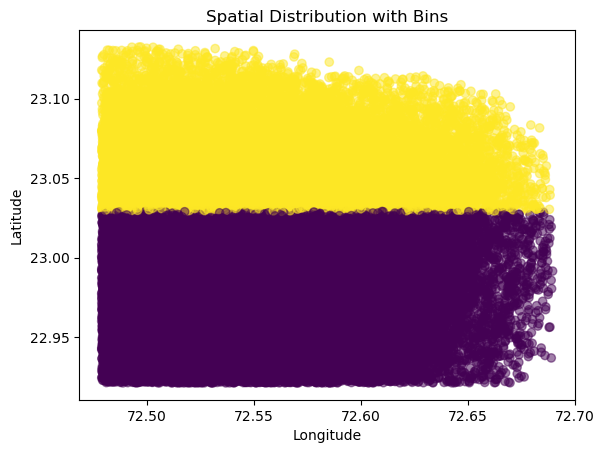

In [15]:
# Scatter plot of latitude and longitude with color-coded bins
plt.scatter(df['longitude'], df['latitude'], c=df['latitude_bin'].cat.codes, cmap='viridis', alpha=0.5)
plt.title('Spatial Distribution with Bins')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Feature Engineering

In [16]:
df['time_interval'] = df['startTime'].dt.floor('15T')  # 15-minute intervals


In [17]:
df['day_of_week'] = pd.to_datetime(df['startTime']).dt.dayofweek
df['hour_of_day'] = pd.to_datetime(df['startTime']).dt.hour

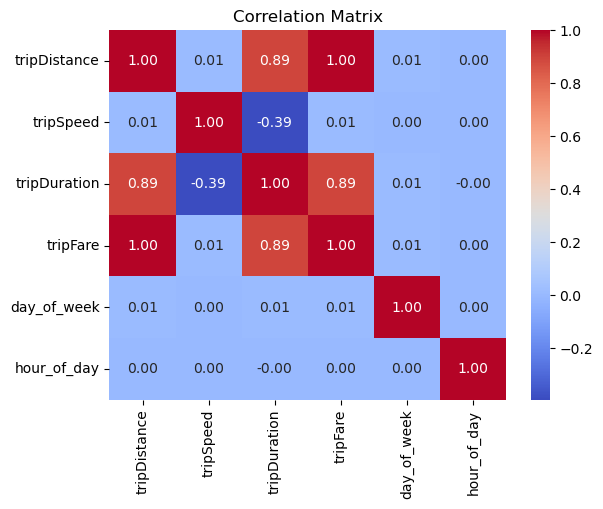

In [18]:
# Checking Correlations

correlation_matrix = df[numerical_columns + ['day_of_week', 'hour_of_day']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [19]:
# Let's dug deeper into the time related features

df['day_of_month'] = df['startTime'].dt.day
df['month'] = df['startTime'].dt.month
df['year'] = df['startTime'].dt.year

In [20]:
# And we should have some binary features that would help help us in later stages

df['is_peak_hour'] = df['hour_of_day'].between(8, 18).astype(int)
df['is_business_day'] = df['day_of_week'].between(0, 4).astype(int)

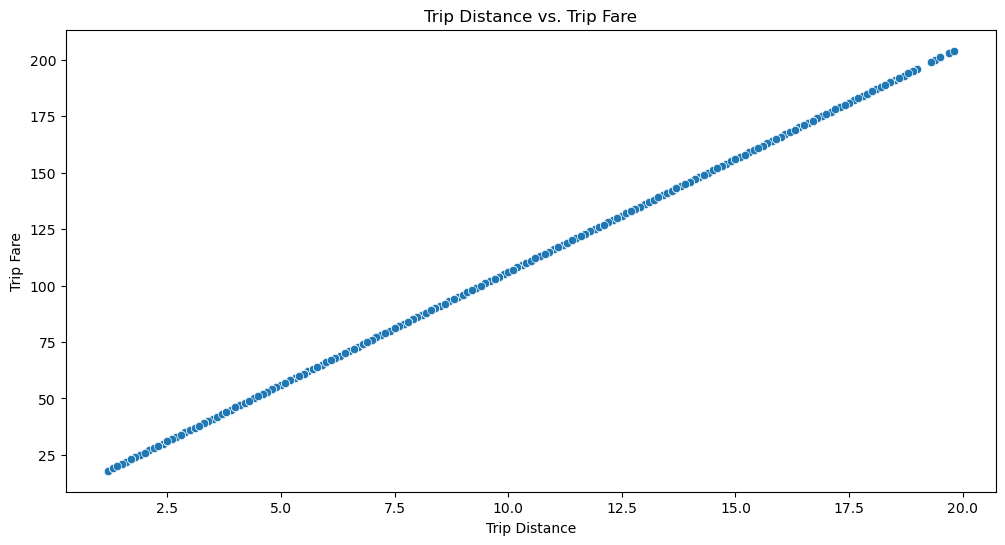

In [21]:
# Relationship between trip distance and fare
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tripDistance', y='tripFare', data=df)
plt.title('Trip Distance vs. Trip Fare')
plt.xlabel('Trip Distance')
plt.ylabel('Trip Fare')
plt.show()

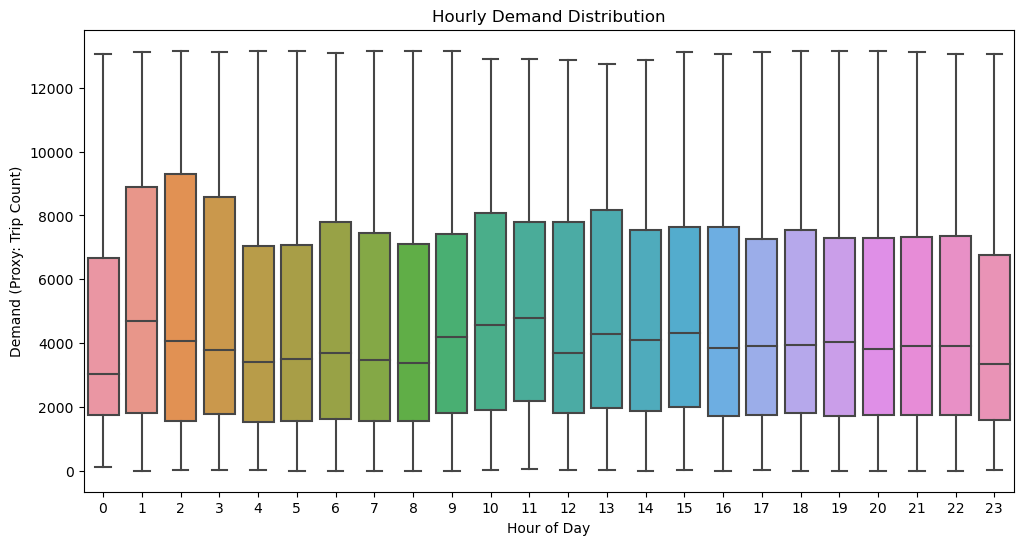

In [22]:
# Demand distribution across different hours of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour_of_day', y='tripId', data=df)  # Using 'tripId' as a proxy for demand
plt.title('Hourly Demand Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Demand (Proxy: Trip Count)')
plt.show()

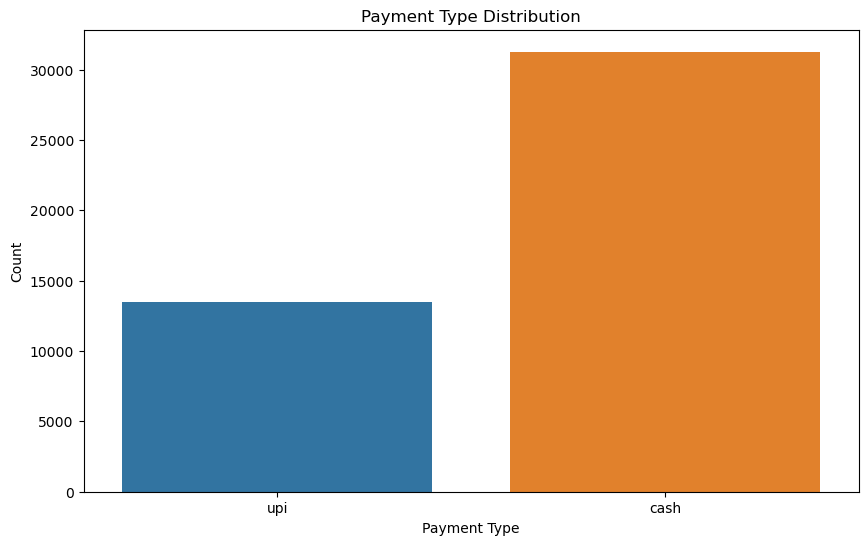

In [23]:
# Distribution of payment types
plt.figure(figsize=(10, 6))
sns.countplot(x='paymentType', data=df)
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

In [24]:
df.head()

,Unnamed: 0,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,startTime,tripFare,...,latitude_bin,longitude_bin,time_interval,day_of_week,hour_of_day,day_of_month,month,year,is_peak_hour,is_business_day
0,0,1,0,"[23.075897, 72.483299]",11.8,24.97,28,"[23.075855, 72.598551]",2023-01-01 18:53:00,124,...,Bin 2,Bin 2,2023-01-01 18:45:00,6,18,1,1,2023,1,0
1,1,1,1,"[23.002, 72.550009]",8.5,15.34,33,"[23.072137, 72.583952]",2023-01-01 20:39:00,91,...,Bin 1,Bin 2,2023-01-01 20:30:00,6,20,1,1,2023,0,0
2,2,1,2,"[22.929988, 72.578228]",13.4,27.74,29,"[23.050404, 72.578228]",2023-01-01 21:24:00,140,...,Bin 1,Bin 3,2023-01-01 21:15:00,6,21,1,1,2023,0,0
3,3,1,3,"[23.029391, 72.555201]",6.3,14.47,26,"[23.061703, 72.605368]",2023-01-01 21:58:00,69,...,Bin 2,Bin 2,2023-01-01 21:45:00,6,21,1,1,2023,0,0
4,4,1,4,"[23.067932, 72.51617]",5.7,13.42,25,"[23.103956, 72.55534]",2023-01-01 22:47:00,63,...,Bin 2,Bin 2,2023-01-01 22:45:00,6,22,1,1,2023,0,0


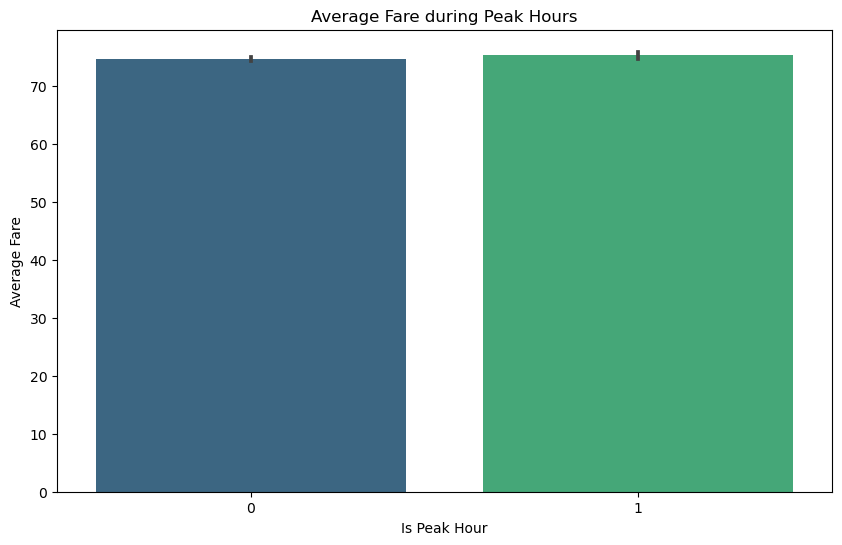

In [28]:
# Bar plot for 'is_peak_hour' vs. 'tripFare'
plt.figure(figsize=(10, 6))
sns.barplot(x='is_peak_hour', y='tripFare', data=df, palette='viridis')
plt.title('Average Fare during Peak Hours')
plt.xlabel('Is Peak Hour')
plt.ylabel('Average Fare')
plt.show()

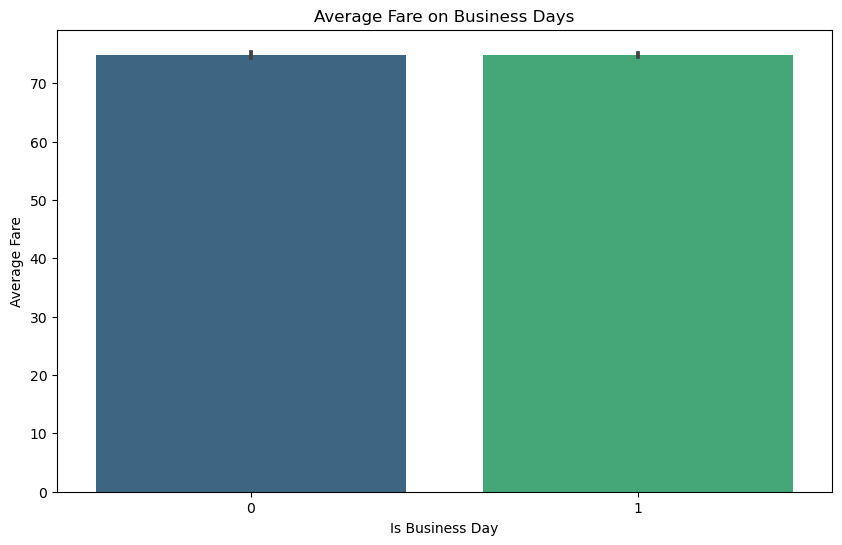

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='is_business_day', y='tripFare', data=df, palette='viridis')
plt.title('Average Fare on Business Days')
plt.xlabel('Is Business Day')
plt.ylabel('Average Fare')
plt.show()

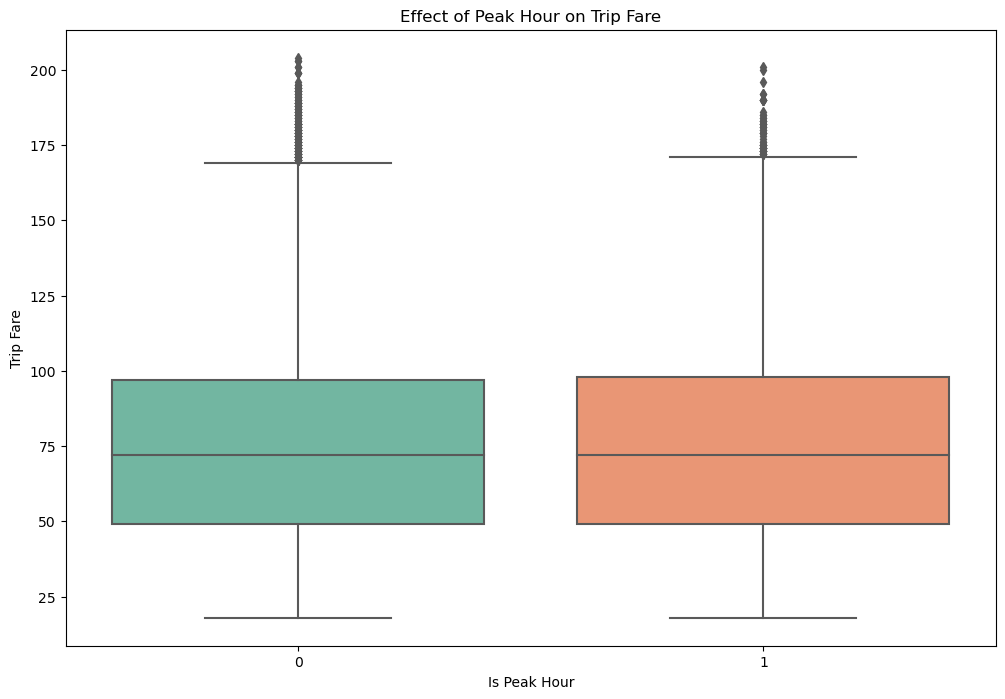

In [30]:
# Box plot for 'is_peak_hour' vs. 'tripFare'
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_peak_hour', y='tripFare', data=df, palette='Set2')
plt.title('Effect of Peak Hour on Trip Fare')
plt.xlabel('Is Peak Hour')
plt.ylabel('Trip Fare')
plt.show()

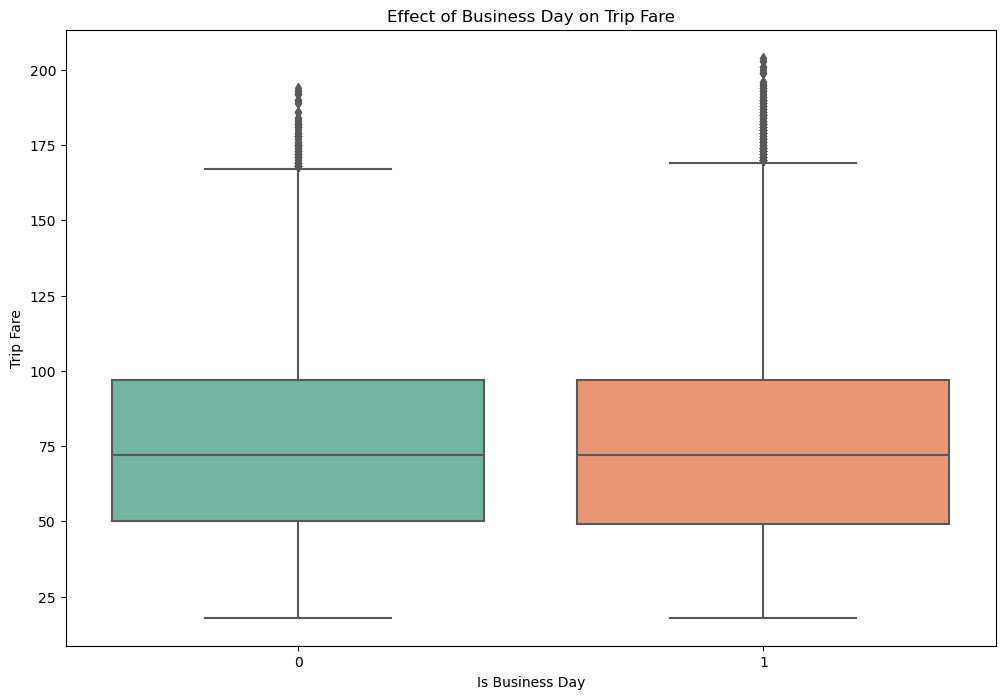

In [31]:
# Box plot for 'is_business_day' vs. 'tripFare'
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_business_day', y='tripFare', data=df, palette='Set2')
plt.title('Effect of Business Day on Trip Fare')
plt.xlabel('Is Business Day')
plt.ylabel('Trip Fare')
plt.show()

## From above graph we can say that prices are not changes regardless of holiday or businessday and peak hour or non-peak hour.

## So, we can rule out the possibility of price surge.

## Now, Let's check the effect of peak hour or bussiness day on demand of trips (Number of trips booked)

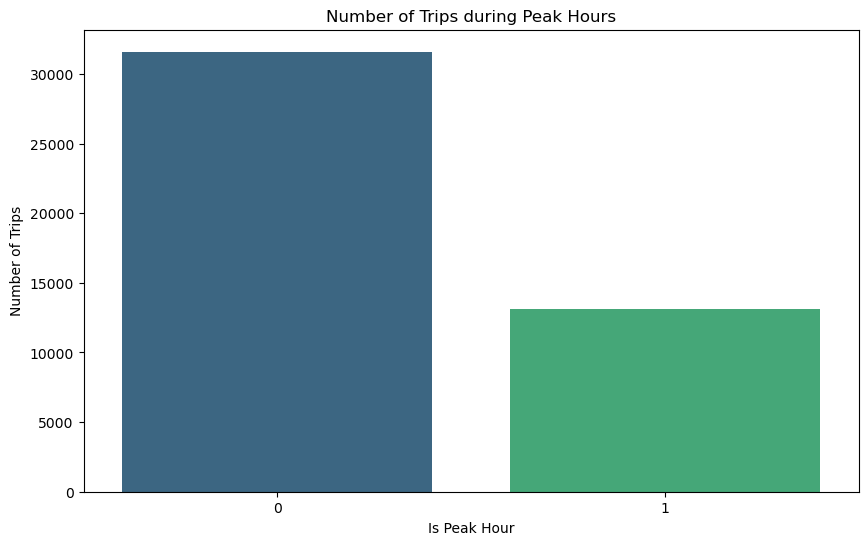

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_peak_hour', data=df, palette='viridis')
plt.title('Number of Trips during Peak Hours')
plt.xlabel('Is Peak Hour')
plt.ylabel('Number of Trips')
plt.show()

### We can see that more trips are booked during "Non-Peak Hours" and "Bussiness Days"

- Which is obvious because of the obvious imbalance between "peak and non-peak hours" and "weekends vs business days"

# Analysis on the Hints provided

## Hint 1: Temporal Aggregation

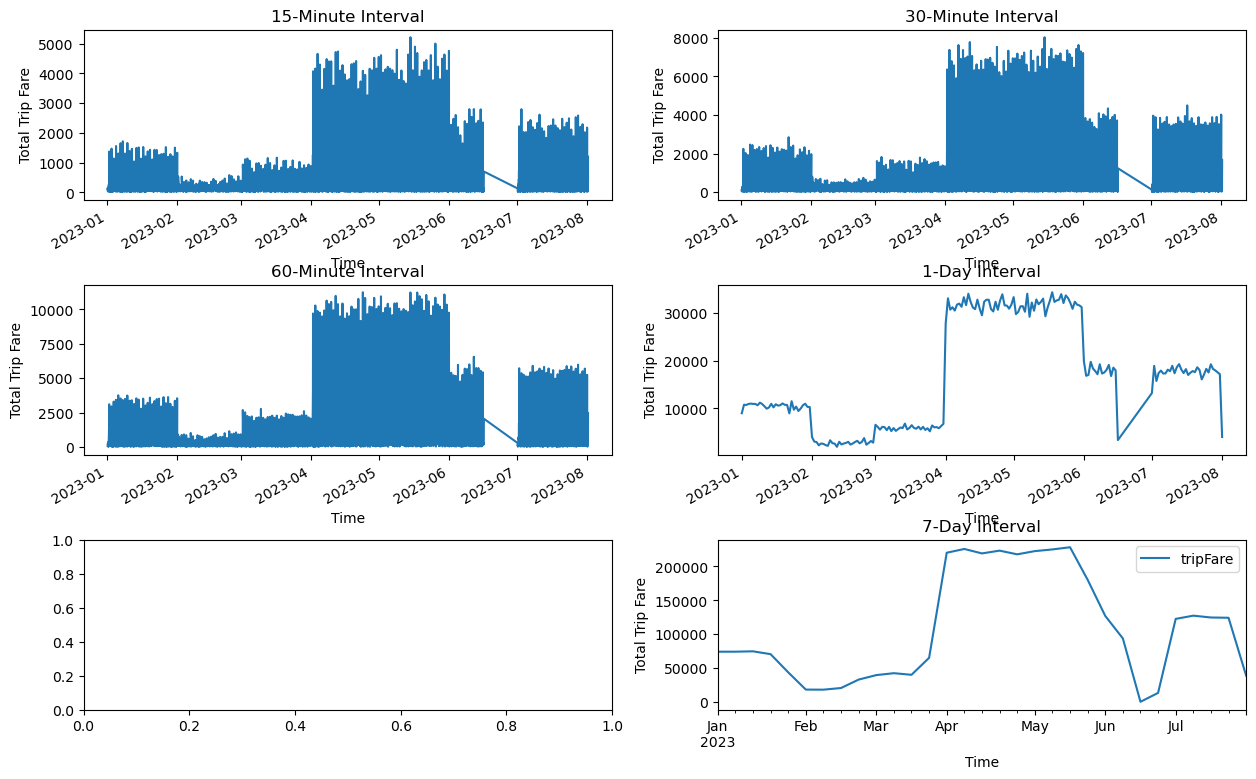

In [37]:
# Creating additional time intervals
df['15min_interval'] = df['startTime'].dt.floor('15min')
df['30min_interval'] = df['startTime'].dt.floor('30min')
df['60min_interval'] = df['startTime'].dt.floor('60min')
df['1day_interval'] = df['startTime'].dt.floor('1D')

# For 7-day intervals, we will use resamping method
weekly_aggregated = df.resample('7D', on='startTime')['tripFare'].sum().reset_index()

# Plot the patterns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

intervals = ['15min_interval', '30min_interval', '60min_interval', '1day_interval']
titles = ['15-Minute Interval', '30-Minute Interval', '60-Minute Interval', '1-Day Interval']

for i, interval in enumerate(intervals):
    ax = axes.flatten()[i]
    df.groupby(interval)['tripFare'].sum().plot(ax=ax)
    ax.set_title(titles[i])
    ax.set_ylabel('Total Trip Fare')
    ax.set_xlabel('Time')

# Plot for 7-day interval
ax = axes.flatten()[-1]
weekly_aggregated.plot(x='startTime', y='tripFare', ax=ax)
ax.set_title('7-Day Interval')
ax.set_ylabel('Total Trip Fare')
ax.set_xlabel('Time')

plt.show()


### All the graphs shows similar patters that means tripFare is relatively similer regardless the time intervals

### PS--> We could try seasonal decompose to dig deeper inside this

## Let's check with trend method on one interval and see if we could find anything

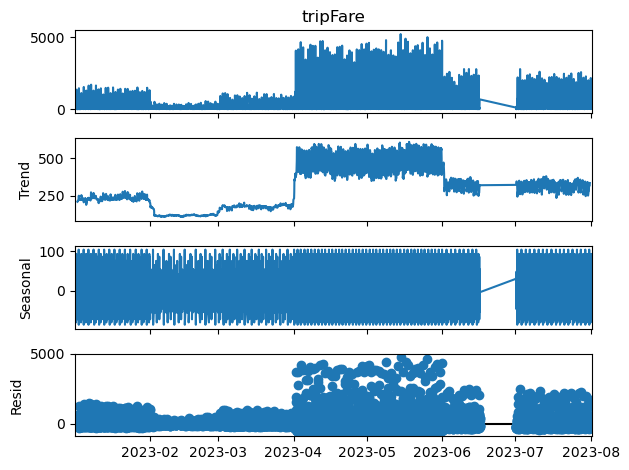

In [40]:
df['15min_interval'] = df['startTime'].dt.floor('15min')

# Performing seasonal decomposition with trend method
result = seasonal_decompose(df.groupby('15min_interval')['tripFare'].sum(), model='additive', period=96)

# Plotting the original and decomposed time series
result.plot()
plt.show()

### Seems like there is not much difference except seasonal

# Now, we can save this Feature engineered data and move on towards model building

In [41]:
# Saving the feature-engineered DataFrame to a new CSV file
df.to_csv('feature_engineered_data.csv', index=False)
